In [ ]:
# this notebook is working in the whole data frame,
# not column names are aproximations at this point.
#       first I adjust the names of some of the collumns, 
#       then I adjust the data in the "age" to be a float so I can take the averages when I group by other columns
#       then I adjust the answers in 'Ed_Level', to make them 1 word responses
#       then I adjust the 'Years_code' data, some answers are not floats but strings
#       then I organize the 'languages used' by exsploding out the answers into single counts per mention then counting by language 
#       then I adjust the answers in 'mental_health', to make them 1 word responses
#       then I look at the mental heath distributions with and with out the "none"
#       then i look at gender for the whole group

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data/survey_results_public.csv')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='qname')
df.set_index('ResponseId', inplace=True)
pd.set_option('display.max_columns',85)# applys to both df's schema and results
pd.set_option('display.max_rows',85) # applys to both df's schema and results
#df.columns
#schema_df.columns


In [2]:
#Adjusting column names 
df_whole = df.rename(columns = {'Knowledge_1': 'DevOP interactOutOfMyTeam.',
 'Knowledge_2': "DevOP NegImpactInfoSilos",
 'Knowledge_3': 'up-to-dateIinfo_forjob.',
 'Knowledge_4': 'enough tools resources?',
 'Knowledge_5': 'trained on tools resources?',
 'Knowledge_6': 'often repeat answer to quests',
 'Knowledge_7': 'bottelneck Waiting on answers',
 'Frequency_1': 'Freq: DevOP Need help outside of team?',
 'Frequency_2': 'Freq: DevOP interactOutOfMyTeam',
 'Frequency_3': "Freq:Encounter info silos",
 'TrueFalse_1': 'support new hires?',
 'TrueFalse_2': 'use provided learning reso?',
 'TrueFalse_3': 'Comp give time learn new skills?'})

# clean up ed_level
# change age to average
#df.head(65)

In [3]:
#Edit age

###  looking at age Distribution  ###:
# What is the data type? It is in ranges.
#df_whole['Age'].unique()
#df_whole['Age'].value_counts()

        
def change_age(age):
    if pd.isna(age):
        return np.NaN
    elif age == "Prefer not to say":
        return np.NaN
    elif age == "Under 18 years old":
        return 16
    elif age == "18-24 years old":
        return 21
    elif age == "25-34 years old":
        return 29.5
    elif age == "35-44 years old":
        return 39.5
    elif age == "45-54 years old":
        return 49.5
    elif age == "55-64 years old":
        return 55.9
    elif age == "65 years or older":
        return 70
    else:
        raise ValueError("Invalid interval value: {}".format(age))    
        
# NOTE: Overwriting ages in df_whole from ranges in to floats. This is permanant and need only run once per eval.
#       If "text Change_age already complete" appears then it has run already.


# Function to  change age, checks first if changes have been made to avoide errors.   
if all(isinstance(age, float) for age in df_whole['Age'].values):
    print("Change_age already complete")
else:df_whole.loc[:, 'Age'] = df_whole['Age'].apply(change_age)


#looking at age distribution after change, looks good
#df_whole['Age'].unique()

display(df_whole['Age'].value_counts())


# Recording participation: 
x = df_whole['Age'].count()
y = len(df_whole)

print(f'Participation in age question is: {x} / {y}')
#display(df_whole['Age'].count())



C:\Users\Adison\AppData\Local\Temp\ipykernel_9712\3633444471.py:38: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  else:df_whole.loc[:, 'Age'] = df_whole['Age'].apply(change_age)


29.5    28112
21.0    16646
39.5    13988
49.5     5281
16.0     3866
55.9     1978
70.0      554
Name: Age, dtype: int64

Participation in age question is: 70425 / 73268


In [4]:
# edit Ed_level
### Education level ###:

# Replace original education levels with simplified versions:
replace_dict = {
    'Some college/university study without earning a degree': 'Some college',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary school',
    'Associate degree (A.A., A.S., etc.)':"Associate",
    'Other doctoral degree (Ph.D., Ed.D., etc.)':'Doctoral', 
    'Primary/elementary school':'Primary/Elementary', 
    'Professional degree (JD, MD, etc.)': 'Juris Doctor'
    
}

# education level added to df_45 

df_whole = df_whole.replace(replace_dict)
df_whole['EdLevel']
df_whole['EdLevel'].unique()
display(df_whole['EdLevel'].value_counts())

# Recording participation: 
x = df_whole['EdLevel'].count()
y = len(df_whole)

print(f'Participation in Ed Level question is: {x} / {y}')


Bachelor’s            30276
Master’s              15486
Some college           9326
Secondary school       7904
Associate              2236
Doctoral               2169
Primary/Elementary     1806
Something else         1247
Juris Doctor           1121
Name: EdLevel, dtype: int64

Participation in Ed Level question is: 71571 / 73268


In [5]:
# edit years code
###  looking at YearsCode   ###:
#df_whole['YearsCode'].unique()

# Fix data in 'years code'
# Replacing/rewriting string responses with float values:
df_whole.loc[df_whole['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0
#df_whole_45.is_copy = False
df_whole.loc[df_whole['YearsCode'] == 'More than 50 years', 'YearsCode'] = 51
#df_whole_45.is_copy = False
# Ensuring Everything is a float, I had a few error messages to compete with.
#df_whole.loc[:, 'YearsCode'] = df_whole['YearsCode'].astype(float)
#df_whole_45['YearsCode'] = df_whole_45['YearsCode'].astype(float)
# This is_copy = Fales is to cancel out errors/warnings I kept getting. 
df_whole.is_copy = False
df_whole['YearsCode'].value_counts()

# Recording participation: 
x = df_whole['YearsCode'].count()
y = len(df_whole)

print(f'Participation in Years Code question is: {x} / {y}')


Participation in Years Code question is: 71331 / 73268


In [6]:
#looking at most used languages


# Replace ';' with ','
df_lang = df_whole

df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.replace(';', ',')

# Split the 'LanguageHaveWorkedWith' column by ',' and explode the resulting list
df_lang = df_lang.assign(LanguageHaveWorkedWith=df_whole['LanguageHaveWorkedWith'].str.split(',')).explode('LanguageHaveWorkedWith')

# Group by 'LanguageHaveWorkedWith', and count the occurrences ".size() is doing the counting in the groups"
df_lang = df_lang.groupby([ 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Sort by 'Count' in descending order
df_lang_sorted = df_lang.sort_values(by='Count', ascending=False)


# Preview the resulting dataframe
print(df_lang_sorted.tail(75))

# Recording participation: 
x = df_whole['LanguageHaveWorkedWith'].count()
y = len(df_whole)

print(f'Participation in Language Have Worked With question is: {x} / {y}')


   LanguageHaveWorkedWith  Count
20             JavaScript  46443
17               HTML/CSS  39142
36                    SQL  35127
31                 Python  34155
40             TypeScript  24752
19                   Java  23644
2              Bash/Shell  20656
4                      C#  19883
5                     C++  16024
28                    PHP  14827
3                       C  13692
30             PowerShell   8575
15                     Go   7922
34                   Rust   6625
22                 Kotlin   6507
9                    Dart   4648
33                   Ruby   4299
1                Assembly   3887
39                  Swift   3489
32                      R   3308
41                    VBA   3185
25                 MATLAB   2913
24                    Lua   2867
16                 Groovy   2357
10                 Delphi   2311
37                  Scala   1837
27            Objective-C   1698
29                   Perl   1644
18                Haskell   1577
11        

In [7]:
# adjusting answers to devops questions so I can get them in percentage of content/ binary 
# Taking a look at it first
df_whole.iloc[:, 58:65]

#making a list to use for selecting multiple columns:
cols = df_whole.iloc[:, 58:65].columns.tolist()
#removeing non-comitalresponses: 
df_whole[cols] = df_whole[cols].replace({'Neither agree nor disagree': np.nan})
#changing remainder to binary of Agree or Disagree
df_whole[cols] = df_whole[cols].replace({'Strongly agree': 'Agree', 'Agree': 'Agree', 'Disagree': 'Disagree', 'Strongly disagree': 'Disagree'})

#taking another look
df_whole.iloc[:, 58:65].head(60)


,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
ResponseId,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Agree,Disagree,Agree,Agree,Agree,Agree,Disagree


In [8]:
# looking at mental health distributions: 
#df['MentalHealth'].apply(lambda x: x.str.split(';').explode()) #.value_counts()

df['MentalHealth'].head(50)

# Removing Na
#df_mental = df_mental.dropna(subset=['MentalHealth'])


# make a copy of the DataFrame, that also removes unwated responses:
df_mental = df[(df['MentalHealth'].str.strip() != 'None of the above') & 
               (df['MentalHealth'].str.strip() != 'Prefer not to say') &
               (df['MentalHealth'].str.strip() != 'Or, in your own words:') &
               ((~df.MentalHealth.str.contains("Or, in your own words:").fillna(True))) ]

#df_mental_count = df_mental.dropna(subset=['MentalHealth']).count()

# Split the mult-string values in the 'MentalHealth' column by the delimiter ';':
df_mental['MentalHealth'] = df_mental['MentalHealth'].str.split(';')

# Use the explode() method to create a new row for each value in the resulting lists:
df_mental = df_mental.explode('MentalHealth')

display(df_mental['MentalHealth'].value_counts())
display(df_mental['MentalHealth'].value_counts().sum())
#display(df_mental_count[['MentalHealth']])

C:\Users\Adison\AppData\Local\Temp\ipykernel_9712\233661681.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mental['MentalHealth'] = df_mental['MentalHealth'].str.split(';')


I have a concentration and/or memory disorder (e.g., ADHD, etc.)                  6916
I have an anxiety disorder                                                        6742
I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)    6332
I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)               2775
I have learning differences (e.g., Dyslexic, Dyslexia, etc.)                      1808
Name: MentalHealth, dtype: int64

24573

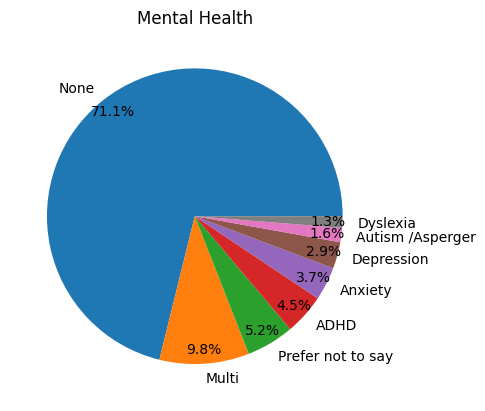

Participation in Mental Health question is: 66447 / 73268


In [9]:
# looking at mental health distributions, including "none": 
# Replace original 'MentalHealth' values with simplified versions:
# remove 'Or, in your own words:'

replace_dict = {
    'I have a concentration and/or memory disorder (e.g., ADHD, etc.)': 'ADHD',
    'I have an anxiety disorder': 'Anxiety',
    'I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)': 'Depression',
    "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)":'Autism /Asperger',
    'I have learning differences (e.g., Dyslexic, Dyslexia, etc.)':'Dyslexia',
    'None of the above':'None'
    }

def change_values(answer):
    # dont need this .apply() creates the for each loop for me. 
    #for answer in df['MentalHealth']:
        if type(answer) == str:
            if len(answer.split(';')) >= 2:
                return 'Multi'
            else:
                return answer
        

# Selecting all rows of DF and the column 'MentalHealth', then setting new values, this only changes the cell values that contain
#           more than one answer into the value "Multi"
df_whole.loc[:, 'MentalHealth'] = df_whole['MentalHealth'].apply(change_values)

#replaceing long answers with abr ones
df_whole['MentalHealth'] = df_whole['MentalHealth'].replace(replace_dict)
        
# create the series
s = df_whole['MentalHealth'].value_counts()

# Get value counts without the "in your own words" category
s.drop("Or, in your own words:", inplace=True)

# plot as a pie chart
plt.pie(s, labels=s.index, autopct='%1.1f%%', pctdistance=.9)
plt.title('Mental Health')
plt.show()

# Recording participation: 
x = df_whole['MentalHealth'].count()
y = len(df_whole)

print(f'Participation in Mental Health question is: {x} / {y}')


In [10]:
# can I group by mental heath and look at some other stuff???please!
mental_health_group = df_whole.groupby(['MentalHealth'])
mental_health_group['EdLevel'].unique()
#mental_health_group['EdLevel'].value_counts().head(60)

#if I want to look at age I need to chagne the values as I did in teh General notebook.
mental_health_group['Age'].value_counts().head(60)
#mental_health_group['Age'].mean()
# get the average

# this looks to be 50/50 for the true false. BOO
#mental_health_group['support new hires?'].value_counts().head(60)

# this looks to be about a 3rd no matter your mental health
#mental_health_group['Comp give time learn new skills?'].value_counts().head(60)
#too much to look at with out a plot
#mental_health_group['enough tools resources?'].value_counts().head(60)
#mental_health_group['enough tools resources?'].value_counts(normalize = True)[:, 'Disagree'].sort_values(ascending=False).head(60)

#looking at if certain countries have a percived level of tools

####country_group = df.groupby(['Country'])

#country_group['enough tools resources?'].value_counts(normalize = True)[:, 'Disagree'].sort_values(ascending=False).head(60)

#country_group['Gender'].value_counts(normalize = True)[:, 'Woman'].sort_values(ascending=False).head(60)


#'Gender'

MentalHealth            Age 
ADHD                    29.5     1216
                        21.0      744
                        39.5      521
                        16.0      211
                        49.5      147
                        55.9       57
                        70.0       11
Anxiety                 29.5     1091
                        21.0      553
                        39.5      480
                        49.5      140
                        16.0      101
                        55.9       25
                        70.0        7
Autism /Asperger        29.5      321
                        21.0      259
                        39.5      177
                        16.0      126
                        49.5       74
                        55.9       39
                        70.0       11
Depression              29.5      746
                        21.0      454
                        39.5      422
                        49.5      146
                     

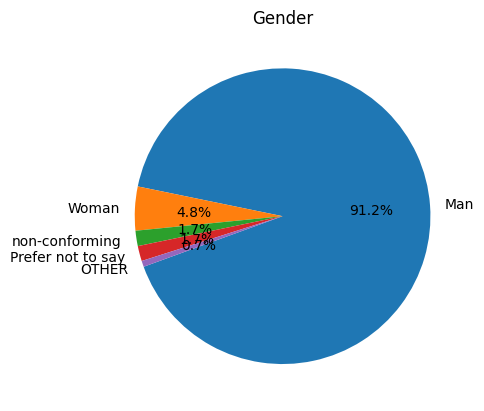

Participation in Gender question is: 70853 / 73268


In [11]:
# looking at gender for the entire group:
# combining all *non-conforming into one catagory,*'s make it a regular exspression and let me search the string'
df_whole['Gender'] = df_whole['Gender'].replace('.*non-conforming*.','non-conforming', regex=True)
# in your own words into Other
df_whole['Gender'] = df_whole['Gender'].replace('.*in your own words.*|.*Or, in your own words:.*','OTHER', regex=True)


#df['Gender'] = df['Gender'].replace('.*OTHER*.','OTHER', regex=True)

gender =df_whole.value_counts('Gender')
# Get value counts without the "Man;Woman" category
gender.drop("Man;Woman", inplace=True)

# plot as a pie chart
plt.pie(gender, labels=gender.index, autopct='%1.1f%%',  startangle=200 )
plt.title('Gender')
plt.show()

# Recording participation: 
x = df_whole['Gender'].count()
y = len(df_whole)

print(f'Participation in Gender question is: {x} / {y}')

In [12]:
df_whole.columns
# can I group by age look at dev op slice
age_group = df_whole.groupby(['Age'])
age_group[ 'DevOP NegImpactInfoSilos'].value_counts(normalize = True)[:, 'Agree']
#age_group['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos','up-to-dateIinfo_forjob.', 'enough tools resources?','trained on tools resources?', 'often repeat answer to quests','bottelneck Waiting on answers'].value_counts(normalize = True)
    
#mental_health_group['EdLevel'].value_counts().head(60)

Age
16.0    0.346154
21.0    0.520087
29.5    0.573319
39.5    0.604533
49.5    0.577810
55.9    0.560606
70.0    0.390805
Name: DevOP NegImpactInfoSilos, dtype: float64

In [13]:


def get_grouped_df(df, groupby_column, columns_to_group):
    # Create a new dataframe to store the grouped values
    grouped_df = pd.DataFrame(columns=columns_to_group)

    # Group the data by the specified column
    grouped = df.groupby(groupby_column)

    # Loop over each column to group
    for col in columns_to_group:
        # Get the value counts for each group and normalize the values
        counts = grouped[col].value_counts(normalize=True)[:, 'Agree']
        # Add the counts to the new dataframe
        grouped_df[col] = counts

    # Reset the index of the new dataframe
    grouped_df = grouped_df.reset_index()

    return grouped_df




grouped_df_age = get_grouped_df(df_whole, 'Age', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])



grouped_df_age



,Age,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
0,16.0,0.785714,0.346154,0.703704,0.888889,0.918033,0.571429,0.703704
1,21.0,0.866084,0.520087,0.739981,0.847398,0.914604,0.658683,0.747561
2,29.5,0.908650,0.573319,0.718899,0.809727,0.887272,0.673400,0.698870
3,39.5,0.933409,0.604533,0.713649,0.784379,0.870647,0.697035,0.686883
4,49.5,0.937405,0.577810,0.709126,0.802708,0.880492,0.712963,0.683827
5,55.9,0.930905,0.560606,0.696486,0.798206,0.870370,0.694885,0.694669
6,70.0,0.925926,0.390805,0.782051,0.857143,0.960784,0.757143,0.597561


In [14]:
grouped_df_mental = get_grouped_df(df_whole, 'MentalHealth', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])

def highlight_min_max(column):
    """
    Highlight the maximum and minimum values in a Pandas series
    """
    # find the maximum and minimum values in the series
    max_val = column.max()
    min_val = column.min()

    # create an empty list to store the style information for each value
    styles = []
    for value in column:
        # if the value is the maximum, add the 'max' style to the list
        if value == max_val:
            styles.append('background-color: blue; color: white')
        # if the value is the minimum, add the 'min' style to the list
        elif value == min_val:
            styles.append('background-color: red; color: white')
        # if the value is neither the maximum nor minimum, add an empty style to the list
        else:
            styles.append('')
    # return a Series of style information for each value in the input series
    return pd.Series(styles, index=column.index)

# apply the function to the DataFrame and display it
grouped_df_mental.style.apply(highlight_min_max)

,MentalHealth,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
0,ADHD,0.912143,0.582975,0.696729,0.784021,0.848980,0.689655,0.760069
1,Anxiety,0.885618,0.580348,0.673287,0.781655,0.861811,0.699050,0.742164
2,Autism /Asperger,0.897849,0.589905,0.686520,0.720365,0.837079,0.585987,0.723724
3,Depression,0.870690,0.565107,0.644993,0.743725,0.825416,0.669799,0.709184
4,Dyslexia,0.932468,0.591362,0.726444,0.746224,0.853801,0.720779,0.748428
5,Multi,0.878567,0.613897,0.650061,0.716814,0.819005,0.708537,0.761268
6,None,0.919920,0.559533,0.738509,0.830887,0.905174,0.676271,0.681883
7,"Or, in your own words:",0.892430,0.654450,0.666667,0.798995,0.859813,0.696682,0.741627
8,Prefer not to say,0.896730,0.641509,0.686047,0.773404,0.858128,0.686059,0.747881


In [15]:
grouped_df_ed = get_grouped_df(df_whole, 'EdLevel', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])



grouped_df_ed

# apply the function to the DataFrame and display it
grouped_df_ed.style.apply(highlight_min_max)


,EdLevel,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
0,Associate,0.907480,0.594238,0.696827,0.785227,0.883996,0.693168,0.734982
1,Bachelor’s,0.910499,0.580601,0.724273,0.811860,0.884594,0.688795,0.717061
2,Doctoral,0.927043,0.604450,0.687023,0.803970,0.883372,0.639842,0.607595
3,Juris Doctor,0.890196,0.546875,0.761021,0.850780,0.916143,0.736585,0.728180
4,Master’s,0.921228,0.580620,0.723591,0.800875,0.883460,0.663360,0.680043
5,Primary/Elementary,0.830688,0.523810,0.712418,0.813665,0.861272,0.723684,0.694268
6,Secondary school,0.886755,0.517617,0.681782,0.809414,0.899076,0.680369,0.697767
7,Some college,0.905586,0.534511,0.716591,0.815905,0.895241,0.678595,0.697145
8,Something else,0.891720,0.607438,0.687747,0.817121,0.889286,0.724576,0.749035


In [16]:


grouped_df_Gender = get_grouped_df(df_whole, 'Gender', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])

# set the "Gender" column as the index of the dataframe
grouped_df_Gender.set_index('Gender', inplace=True)

# drop the "Man;Woman" row from the index
grouped_df_Gender.drop("Man;Woman", inplace=True)


# apply the function to the DataFrame and display it
grouped_df_Gender.style.apply(highlight_min_max)

#print(grouped_df_gender.columns)

,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers
Gender,,,,,,,
Man,0.913457,0.571106,0.721211,0.812123,0.889645,0.682479,0.702432
OTHER,0.843537,0.583333,0.632000,0.798450,0.860294,0.692982,0.672269
Prefer not to say,0.900621,0.662835,0.678571,0.755102,0.830986,0.661417,0.704120
Woman,0.885463,0.572770,0.720965,0.786305,0.867763,0.661251,0.693487
non-conforming,0.888646,0.626943,0.669468,0.730028,0.815000,0.651811,0.714286


In [17]:
df_whole

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,DevOP interactOutOfMyTeam.,DevOP NegImpactInfoSilos,up-to-dateIinfo_forjob.,enough tools resources?,trained on tools resources?,often repeat answer to quests,bottelneck Waiting on answers,Freq: DevOP Need help outside of team?,Freq: DevOP interactOutOfMyTeam,Freq:Encounter info silos,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,support new hires?,use provided learning reso?,Comp give time learn new skills?,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,"JavaScript,TypeScript",Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,None,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,Master’s,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,"C#,C++,HTML/CSS,JavaScript,Python",C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,29.5,Man,No,Bisexual,White,None of the above,Multi,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,Bachelor’s,"Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,"C#,JavaScript,SQL,TypeScript",C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Stu

In [18]:
### not working I give upf or the night!!!!!
df_whole.dropna(subset=['YearsCode'], inplace=True)
df_whole['YearsCode'] = df_whole['YearsCode'].astype('Int64')
grouped_df_YearsCode = get_grouped_df(df_whole, 'YearsCode', ['DevOP interactOutOfMyTeam.', 'DevOP NegImpactInfoSilos',
                                              'up-to-dateIinfo_forjob.', 'enough tools resources?',
                                              'trained on tools resources?', 'often repeat answer to quests',
                                              'bottelneck Waiting on answers'])


# apply the function to the DataFrame and display it
grouped_df_YearsCode.style.apply(highlight_min_max)



TypeError: cannot safely cast non-equivalent object to int64